In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

path = './run_results/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]

In [4]:
file_list_py

['result_001_UCR_Anomaly_DISTORTED1sddb40_35000_52000_52620.csv',
 'result_002_UCR_Anomaly_DISTORTED2sddb40_35000_56600_56900.csv',
 'result_003_UCR_Anomaly_DISTORTED3sddb40_35000_46600_46900.csv',
 'result_004_UCR_Anomaly_DISTORTEDBIDMC1_2500_5400_5600.csv',
 'result_005_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature1_4000_5391_5392.csv']

In [28]:
def show_score_df(df, cols=['hidden_size', 'accuracy']):
    base_df = df.loc[df['trainer_name'] == 'BaseTrainer', cols]\
        .sort_values(by=cols, ascending=False)\
        .reset_index(drop=True)\
        .drop_duplicates('hidden_size', keep='first')\
        .reset_index(drop=True)\
        .rename(columns={cols[1]:'Base_' + cols[1]})
        
    new_df = df.loc[df['trainer_name'] == 'NewTrainer', cols]\
    .sort_values(by=cols, ascending=False)\
    .reset_index(drop=True)\
    .drop_duplicates('hidden_size', keep='first')\
    .reset_index(drop=True)\
    .rename(columns={cols[1]:'New_' + cols[1]})

    result_df = pd.merge(base_df, new_df, on='hidden_size')
    return result_df

In [50]:
df = pd.read_csv(path + file_list_py[4])

In [51]:
cols = ['hidden_size', 'accuracy']
print(show_score_df(df, cols))

cols = ['hidden_size', 'precision']
print(show_score_df(df, cols))

cols = ['hidden_size', 'recall']
print(show_score_df(df, cols))

cols = ['hidden_size', 'f1_score']
print(show_score_df(df, cols))

cols = ['hidden_size', 'roc_auc']
print(show_score_df(df, cols))

   hidden_size  Base_accuracy  New_accuracy
0            8         0.9392        0.9583
1            4         0.9656        0.9292
2            2         0.9319        0.9547
   hidden_size  Base_precision  New_precision
0            8          0.0390         0.0406
1            4          0.0328         0.0355
2            2          0.0394         0.0324
   hidden_size  Base_recall  New_recall
0            8       0.5372      0.5785
1            4       0.4463      0.4380
2            2       0.5868      0.4380
   hidden_size  Base_f1_score  New_f1_score
0            8         0.0727        0.0759
1            4         0.0612        0.0657
2            2         0.0739        0.0603
   hidden_size  Base_roc_auc  New_roc_auc
0            8        0.6110       0.6125
1            4        0.5657       0.6221
2            2        0.6049       0.5711


In [ ]:
cols = ['hidden_size', 'accuracy']
show_score_df(df, cols)

In [5]:
df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_csv(path + i)
    df = pd.concat([df,data])
    
df = df.reset_index(drop = True)

In [6]:
df.shape

(420, 21)

In [7]:
df.columns

Index(['trainer_name', 'now', 'return_epoch', 'hidden_size', 'train_loss',
       'val_loss', 'avg_train_anomaly_score', 'std_train_anomaly_score',
       'avg_val_anomaly_score', 'std_val_anomaly_score',
       'avg_test_anomaly_score', 'std_test_anomaly_score',
       'avg_true_anomaly_score', 'std_true_anomaly_score', 'accuracy',
       'precision', 'recall', 'f1_score', 'roc_auc', 'threshold', 'config'],
      dtype='object')

In [9]:
df_hidden2 = df.loc[df['hidden_size'] == 2, :].reset_index(drop=True)
df_hidden4 = df.loc[df['hidden_size'] == 4, :].reset_index(drop=True)
df_hidden8 = df.loc[df['hidden_size'] == 8, :].reset_index(drop=True)

Text(0.5, 1.0, 'avg_true_anomaly_score')

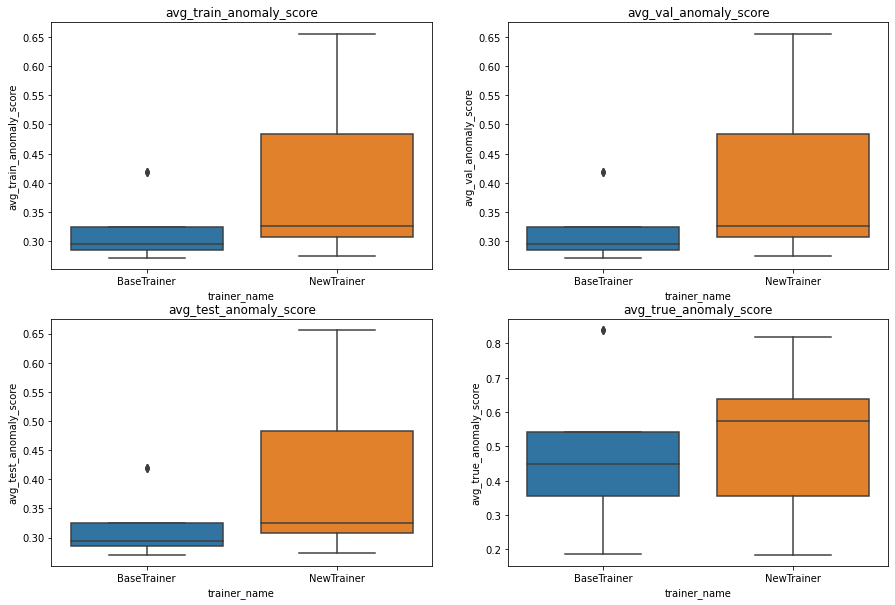

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.boxplot(data=df_hidden2, y='avg_train_anomaly_score', x='trainer_name')
plt.title('avg_train_anomaly_score')
plt.subplot(222)
sns.boxplot(data=df_hidden2, y='avg_val_anomaly_score', x='trainer_name')
plt.title('avg_val_anomaly_score')
plt.subplot(223)
sns.boxplot(data=df_hidden2, y='avg_test_anomaly_score', x='trainer_name')
plt.title('avg_test_anomaly_score')
plt.subplot(224)
sns.boxplot(data=df_hidden2, y='avg_true_anomaly_score', x='trainer_name')
plt.title('avg_true_anomaly_score')

In [16]:
df_hidden2.columns

Index(['trainer_name', 'now', 'return_epoch', 'hidden_size', 'train_loss',
       'val_loss', 'avg_train_anomaly_score', 'std_train_anomaly_score',
       'avg_val_anomaly_score', 'std_val_anomaly_score',
       'avg_test_anomaly_score', 'std_test_anomaly_score',
       'avg_true_anomaly_score', 'std_true_anomaly_score', 'accuracy',
       'precision', 'recall', 'f1_score', 'roc_auc', 'threshold', 'config'],
      dtype='object')

Text(0.5, 1.0, 'f1_score')

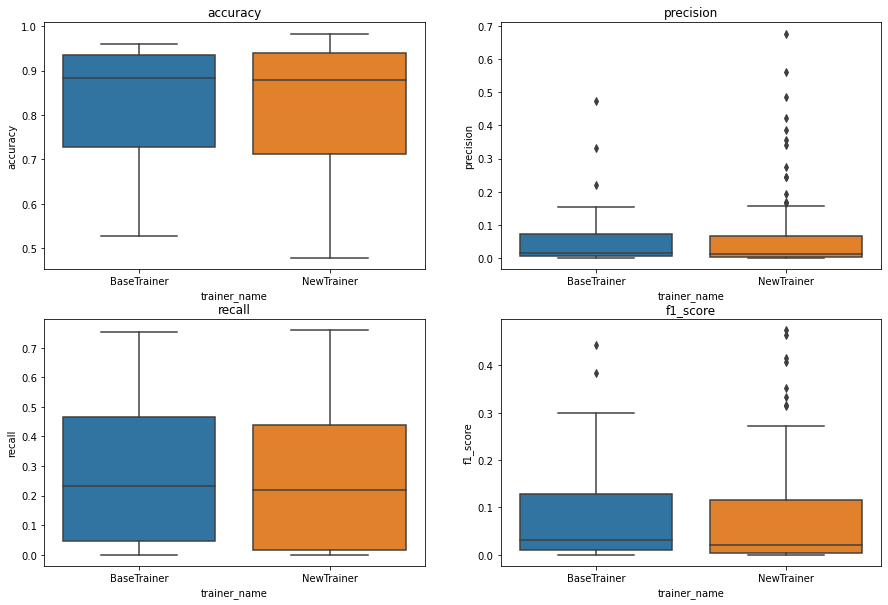

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.boxplot(data=df_hidden2, y='accuracy', x='trainer_name')
plt.title('accuracy')
plt.subplot(222)
sns.boxplot(data=df_hidden2, y='precision', x='trainer_name')
plt.title('precision')
plt.subplot(223)
sns.boxplot(data=df_hidden2, y='recall', x='trainer_name')
plt.title('recall')
plt.subplot(224)
sns.boxplot(data=df_hidden2, y='f1_score', x='trainer_name')
plt.title('f1_score')

Text(0.5, 1.0, 'roc_auc')

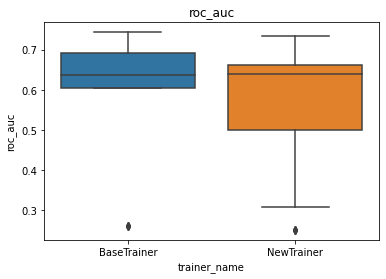

In [18]:
sns.boxplot(data=df_hidden2, y='roc_auc', x='trainer_name')
plt.title('roc_auc')